## データセット確認

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

data_breast_cancer = load_breast_cancer()

df_target = pd.DataFrame(data_breast_cancer["target"], columns=["target"])
df_data = pd.DataFrame(data_breast_cancer["data"], columns=data_breast_cancer["feature_names"])
df = pd.concat([df_target,df_data],axis=1)
df


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print(data_breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
fig, axes = plt.subplots(10,3,figsize=(10,20))

malignant = df[df["target"]==0]
benign = df[df["target"]==1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(df.iloc[:,i+1], bins=50)
    ax[i].hist(malignant.iloc[:,i+1].values, bins=bins, alpha=0.5)
    ax[i].hist(benign.iloc[:,i+1].values, bins=bins, alpha=0.5)
    ax[i].set_title(df.columns[i+1])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()                    

## 前処理

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y= df["target"]

X = df.loc[:, "mean radius":]

#データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

#標準化
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
# 訓練データの最大最小値利用
X_test_scaled = scaler.transform(X_test)

## 実装

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X_train_scaled)

PCA(n_components=30)

In [ ]:
print(pca.explained_variance_ratio_)

[4.33151261e-01 1.95865064e-01 9.57061086e-02 6.68256792e-02
 5.71099742e-02 4.02177092e-02 2.17658540e-02 1.48998125e-02
 1.41051623e-02 1.17646492e-02 1.04466423e-02 8.92872287e-03
 7.85431930e-03 5.01584805e-03 3.13322648e-03 2.65044932e-03
 1.98943309e-03 1.68551393e-03 1.49667384e-03 1.05953262e-03
 1.05116615e-03 8.54150580e-04 7.21294486e-04 6.01226101e-04
 5.47278774e-04 2.60309706e-04 2.16631872e-04 4.69695401e-05
 2.56644788e-05 3.67268770e-06]


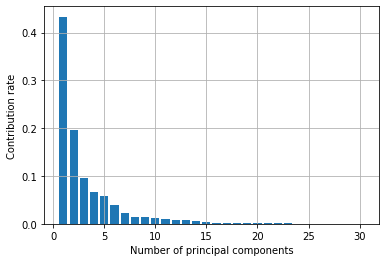

In [ ]:
# 主成分のグラフ化
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.ylabel("Contribution rate")
plt.xlabel("Number of principal components")
plt.grid()
